Nama : Muhamad Dafik Kholik Firdaus

Nim   : 20220040146

Klz : TI22A

PENGELOLAHAN CITRA DIGITAL SESI 5


In [1]:
pip install numpy opencv-python matplotlib


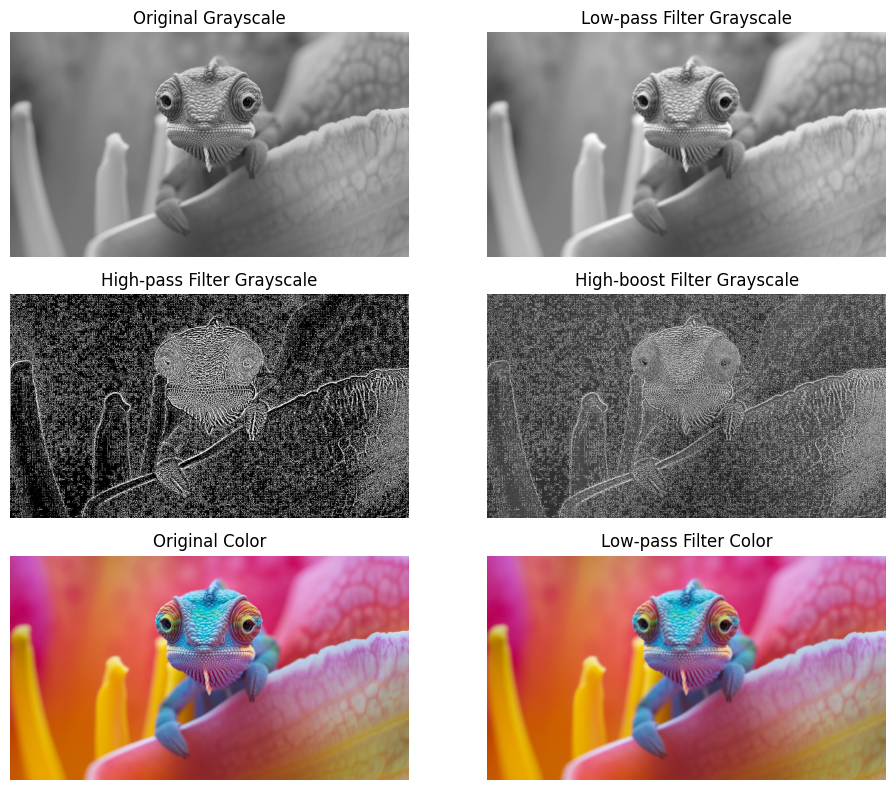

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membuat kernel filter
def create_gaussian_kernel(size, sigma):
    """Membuat kernel Gaussian untuk low-pass filter"""
    kernel = cv2.getGaussianKernel(size, sigma)
    return kernel @ kernel.T

def create_sobel_kernel():
    """Membuat kernel Sobel untuk high-pass filter"""
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return sobel_x, sobel_y

def high_pass_filter(img):
    """Menerapkan high-pass filter dengan mengurangi low-pass filter dari citra"""
    low_pass = cv2.GaussianBlur(img, (5, 5), 1.5)
    high_pass = img - low_pass
    return high_pass

def high_boost_filter(img, alpha=1.5):
    """Menerapkan high-boost filter"""
    high_pass = high_pass_filter(img)
    return img + alpha * high_pass

def apply_filter(img, kernel):
    """Menerapkan filter ke citra menggunakan konvolusi"""
    return cv2.filter2D(img, -1, kernel)

# Load citra grayscale dan citra berwarna
image_gray = cv2.imread('/content/kadal.jpg', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('/content/kadal.jpg')

# Pastikan citra grayscale ada
if image_gray is None:
    raise ValueError("Citra grayscale tidak ditemukan!")

# 1. Low-pass filter untuk citra grayscale
gaussian_kernel = create_gaussian_kernel(5, 1.5)
low_pass_gray = apply_filter(image_gray, gaussian_kernel)

# 2. High-pass filter untuk citra grayscale
high_pass_gray = high_pass_filter(image_gray)

# 3. High-boost filter untuk citra grayscale
high_boost_gray = high_boost_filter(image_gray)

# 4. Low-pass filter untuk citra berwarna
low_pass_color = cv2.GaussianBlur(image_color, (5, 5), 1.5)

# 5. High-pass filter untuk citra berwarna
high_pass_color = image_color - low_pass_color

# 6. High-boost filter untuk citra berwarna
high_boost_color = image_color + 1.5 * high_pass_color

# Menampilkan hasil filter
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Citra Grayscale
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(low_pass_gray, cmap='gray')
axes[0, 1].set_title('Low-pass Filter Grayscale')
axes[0, 1].axis('off')

axes[1, 0].imshow(high_pass_gray, cmap='gray')
axes[1, 0].set_title('High-pass Filter Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(high_boost_gray, cmap='gray')
axes[1, 1].set_title('High-boost Filter Grayscale')
axes[1, 1].axis('off')

# Citra Berwarna
axes[2, 0].imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
axes[2, 0].set_title('Original Color')
axes[2, 0].axis('off')

axes[2, 1].imshow(cv2.cvtColor(low_pass_color, cv2.COLOR_BGR2RGB))
axes[2, 1].set_title('Low-pass Filter Color')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
